# Compression EG

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from importlib import reload
from IPython.display import display, Markdown, Latex
sns.set()

In [3]:
def pltwc(ax):
    sns.scatterplot(ax=ax,x='p',y='wc',data=df
                   , marker='x', color='r')
    sns.lineplot(ax=ax,x='p',y='wc',data=df
                   , color='b')

    t=ax.set_xlabel("P(MPa)")
    t=ax.set_ylabel(r'$W_c(kWh)$')
    leg = ax.legend([r'$4.63P^{.06249}-4.581$ [curve fit]'
                     ,r'$T(S_1-S_2)-(H_1-H_2)$ [NIST]'])
    
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)    
    
    return ax

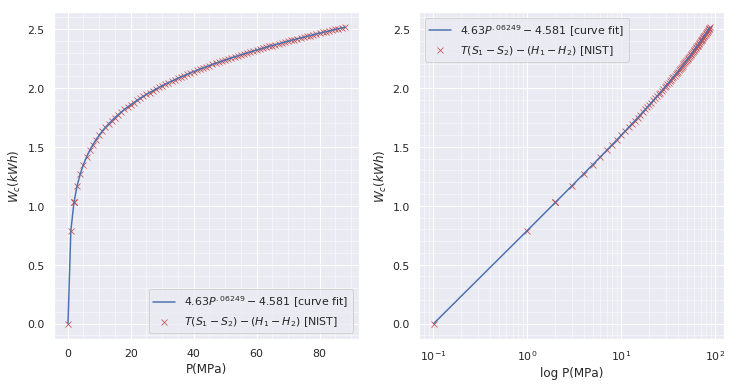

In [4]:
# Load data from pickle
df = pd.read_pickle('compression.pickle')

# Add curve-fit
df['curve'] = 4.63*df.p**0.06249 - 4.581

# Create plots
f, axes = plt.subplots(1, 2,figsize=(12, 6))  
pltwc(axes[0])
pltwc(axes[1])
axes[1].set_xscale('log')
t=axes[1].set_xlabel("log P(MPa)")
f.savefig('img_compression.png')